In [0]:
#importing necessary pacakages
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [42]:
df = pd.read_csv("Tweet.csv")
df.head()

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [6]:
df.shape

(5968, 2)

In [43]:
join_before = []
for i in df['Tweet']:  
  join_before.append(i)
print(join_before)

['Not Available', 'IOS 9 App Transport Security. Mm need to check if my 3rd party network pod supports it http://t.co/fmtcfUAdgj', 'Mar if you have an iOS device, you should download our app too: http://t.co/gl3tn2uDnD', '@jimmie_vanagon my phone does not run on latest IOS which may account for problem the other day .. time it was replaced', "Not sure how to start your publication on iOS? We'll be live helping with ask me anything sessions today and Friday http://t.co/KPqqGjjh3x", 'Two Dollar Tuesday is here with Forklift 2, QuickKey for iOS and Suite for Pages for just $1.99 today:   http://t.co/BNMFOEACw5', "If you're not already signed up to test my iOS game, nows your chance! https://t.co/eZhIU6EDpQ", 'YouTube Gaming Officially Launches On Web, Android, iOS On August 26: YouTube is finally going to r... http://t.co/qbhyA3kaWP #webseries', 'YouTube Gaming Launches Tomorrow with iOS and Android Apps to Go Head-to-Head with Twitch http://t.co/yZOATToeJC #ios #game', "@astrill Yashan f

In [0]:
import re  
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [0]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")

In [0]:
# removing special characters, numbers, punctuations using regular expression

df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

In [0]:
#removing short words less than 2

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [48]:

df.head()

,Tweet,Category,clean_tweet
0,Not Available,negative,Not Available
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security need check party ne...
2,"Mar if you have an iOS device, you should down...",neutral,Mar you have iOS device you should download ou...
3,@jimmie_vanagon my phone does not run on lates...,negative,phone does not run latest IOS which may accoun...
4,Not sure how to start your publication on iOS?...,positive,Not sure how start your publication iOS live h...


## ***Tokenization***

In [32]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()



0                                     [Not, Available]
1    [IOS, App, Transport, Security, need, check, p...
2    [Mar, you, have, iOS, device, you, should, dow...
3    [phone, does, not, run, latest, IOS, which, ma...
4    [Not, sure, how, start, your, publication, iOS...
Name: clean_tweet, dtype: object

## ***Stemming***

In [29]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stemmed_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
stemmed_tweet.head()

0                                         [not, avail]
1    [io, app, transport, secur, need, check, parti...
2    [mar, you, have, io, devic, you, should, downl...
3    [phone, doe, not, run, latest, io, which, may,...
4    [not, sure, how, start, your, public, io, live...
Name: clean_tweet, dtype: object

# **Lemmatization**

In [30]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmed_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
lemmed_tweet.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                         [not, avail]
1    [io, app, transport, secur, need, check, parti...
2    [mar, you, have, io, devic, you, should, downl...
3    [phone, doe, not, run, latest, io, which, may,...
4    [not, sure, how, start, your, public, io, live...
Name: clean_tweet, dtype: object

In [33]:
for i in range(len(stemmed_tweet)):
    stemmed_tweet[i] = ' '.join(stemmed_tweet[i])

df['clean_tweet'] = stemmed_tweet
df.head()

,Tweet,Category,clean_tweet
0,Not Available,negative,not avail
1,IOS 9 App Transport Security. Mm need to check...,neutral,io app transport secur need check parti networ...
2,"Mar if you have an iOS device, you should down...",neutral,mar you have io devic you should download our ...
3,@jimmie_vanagon my phone does not run on lates...,negative,phone doe not run latest io which may account ...
4,Not sure how to start your publication on iOS?...,positive,not sure how start your public io live help wi...


# ***Word Cloud***

Not Available IOS App Transport Security need check party network pod supports http fmtcfUAdgj Mar you have iOS device you should download our app too http uDnD phone does not run latest IOS which may account for problem the other day time was replaced Not sure how start your publication iOS live helping with ask anything sessions today and Friday http KPqqGjjh Two Dollar Tuesday here with Forklift QuickKey for iOS and Suite for Pages for just today http BNMFOEACw you not already signed test iOS game nows your chance https eZhIU EDpQ YouTube Gaming Officially Launches Web Android iOS August YouTube finally going http qbhyA kaWP #webseries YouTube Gaming Launches Tomorrow with iOS and Android Apps Head Head with Twitch http yZOATToeJC #ios #game Yashan from BBC the VPN access IOS may limited during China military parade Any chance have chat that Parkrun app for iOS downloaded Where have you been before Great app easier access info amp ready for Saturday run http ZyOFhZeRIO Today launche

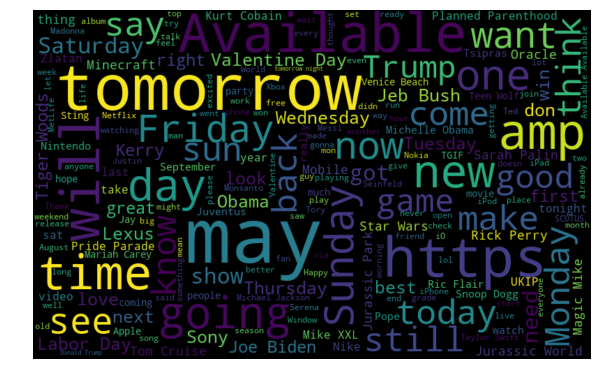

In [49]:
all_words = ' '.join([text for text in df['clean_tweet']])
print(all_words)

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# **Word Frequency**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Token List :  ['Not', 'Available', 'IOS', 'App', 'Transport', 'Security', 'need', 'check', 'party', 'network', 'pod', 'supports', 'http', 'fmtcfUAdgj', 'Mar', 'you', 'have', 'iOS', 'device', 'you']

 Total Tokens :  85168
<FreqDist with 15557 samples and 85168 outcomes>
[('the', 3968), ('http', 1469), ('and', 1397), ('#', 1285), ('for', 1098), ('you', 961), ('may', 919), ('with', 902), ('tomorrow', 674), ('that', 673), ('have', 589), ('Not', 587), ('Available', 550), ('was', 466), ('https', 444), ('but', 436), ('just', 428), ('will', 425), ('this', 413), ('not', 375), ('about', 351), ('amp', 344), ('out', 326), ('see', 317), ('The', 316)]


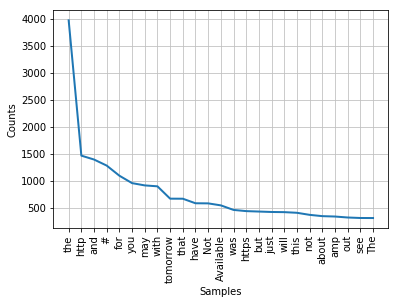

In [50]:
import nltk
nltk.download('punkt')

token_list = nltk.word_tokenize(all_words)
print("Token List : ",token_list[:20])
print("\n Total Tokens : ",len(token_list))

import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

# **Removing Stop Words**

In [51]:
#Download the standard stopword list
nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords

stop_words = stopwords.words('english')


token_list3 = [word for word in token_list if word not in stop_words]

print("Token list after removing stop words : ", token_list3[:20])
print("\nTotal tokens after removing stop words : ", len(token_list3))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Token list after removing stop words :  ['Not', 'Available', 'IOS', 'App', 'Transport', 'Security', 'need', 'check', 'party', 'network', 'pod', 'supports', 'http', 'fmtcfUAdgj', 'Mar', 'iOS', 'device', 'download', 'app', 'http']

Total tokens after removing stop words :  65364


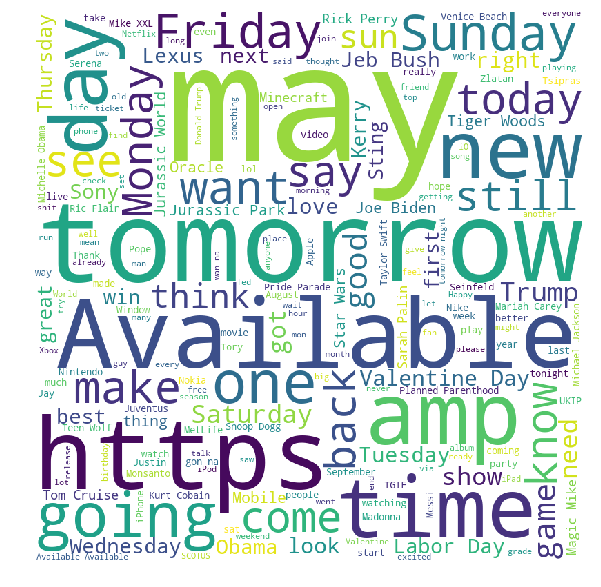

<FreqDist with 15444 samples and 65364 outcomes>
[('http', 1469), ('#', 1285), ('may', 919), ('tomorrow', 674), ('Not', 587), ('Available', 550), ('https', 444), ('amp', 344), ('see', 317), ('The', 316), ('time', 315), ('like', 302), ('day', 283), ('going', 280), ('Sunday', 263), ('Friday', 254), ('get', 230), ('one', 229), ('Day', 217), ('new', 215), ('Obama', 196), ('want', 186), ('night', 185), ('Jurassic', 183), ('Trump', 170)]


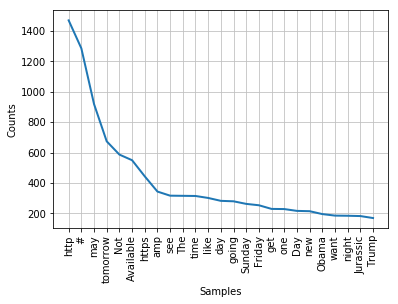

In [65]:

def comment(tokens):
    comment_words = ' '
    for word in tokens:
        comment_words = comment_words + word + ' '
    return comment_words



import matplotlib.pyplot as plt
from wordcloud import WordCloud
stop_word = comment(token_list3)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(stop_word)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list3)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

# **Word Frequency post Stop Word Removal**

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

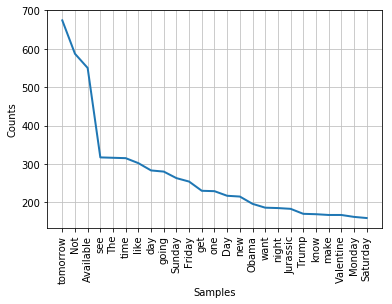

In [66]:
print(stop_words)
stop_words_lst = [ 'http', '#', 'https', 'amp', 'may', 'the','and']

token_list4 = [word for word in token_list3 if word not in stop_words_lst]

import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(token_list4)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

# **Word Cloud - Neutral words**

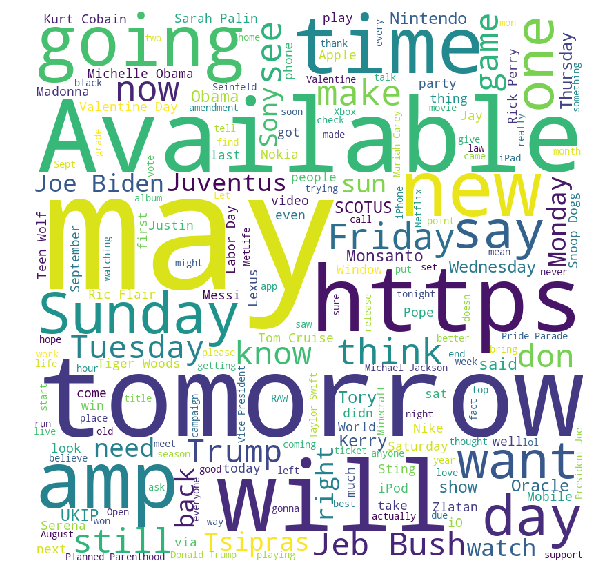

In [55]:
neutral_words =' '.join([text for text in df['clean_tweet'][df['Category'] == "neutral"]])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(neutral_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# **Word Cloud - Positive words**

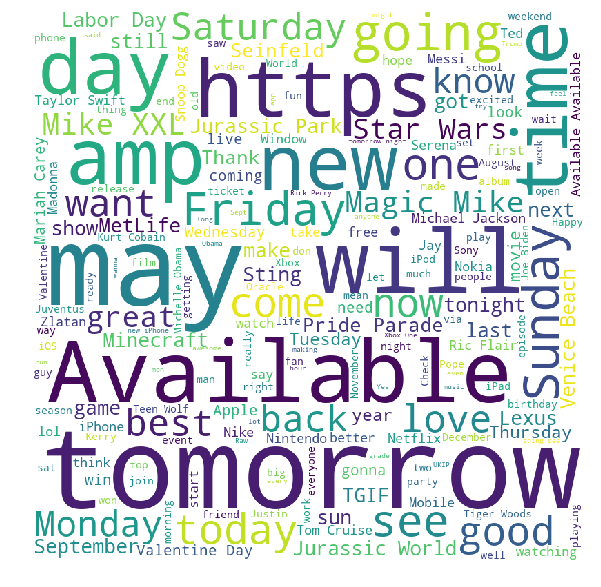

In [57]:
positive_words =' '.join([text for text in df['clean_tweet'][df['Category'] == "positive"]])

wordcloud_p = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(positive_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_p) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# **Word Cloud - Negative words**

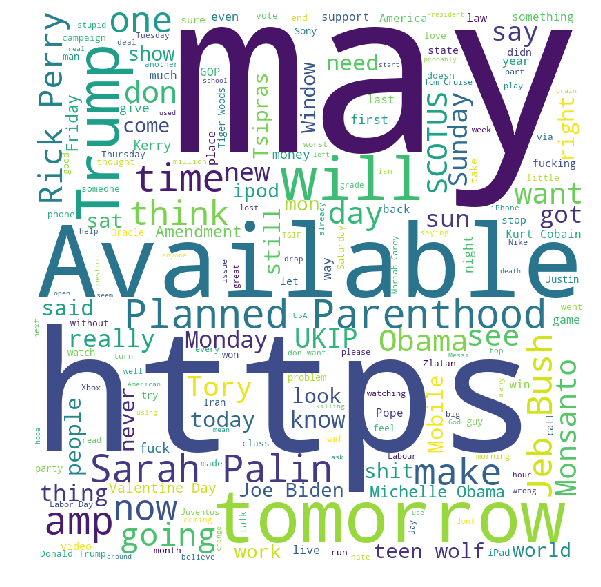

In [58]:
negative_words =' '.join([text for text in df['clean_tweet'][df['Category'] == "negative"]])

wordcloud_n = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(negative_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_n) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# **Creating Bag of Words**

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
print(bow)

  (0, 50)	1
  (1, 408)	1
  (1, 32)	1
  (1, 568)	1
  (1, 128)	1
  (1, 609)	1
  (1, 572)	1
  (1, 392)	1
  (2, 408)	1
  (2, 32)	1
  (2, 392)	1
  (2, 517)	1
  (2, 204)	1
  (2, 221)	1
  (3, 408)	1
  (3, 622)	1
  (3, 212)	1
  (3, 716)	1
  (3, 461)	1
  (3, 2)	1
  (3, 666)	1
  (3, 189)	1
  (3, 869)	1
  (4, 408)	1
  (4, 392)	1
  :	:
  (5964, 320)	1
  (5964, 999)	1
  (5965, 358)	1
  (5965, 641)	1
  (5965, 662)	1
  (5965, 982)	1
  (5965, 981)	1
  (5965, 826)	1
  (5965, 44)	1
  (5965, 671)	1
  (5965, 999)	1
  (5966, 894)	1
  (5966, 307)	1
  (5966, 125)	1
  (5966, 573)	1
  (5966, 73)	1
  (5966, 813)	1
  (5966, 999)	1
  (5967, 894)	1
  (5967, 393)	1
  (5967, 493)	1
  (5967, 294)	1
  (5967, 385)	1
  (5967, 524)	1
  (5967, 999)	2


# **TF_IDF**

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['clean_tweet'])
print(tfidf)

  (0, 50)	1.0
  (1, 392)	0.1695502799637124
  (1, 572)	0.5013836478144271
  (1, 609)	0.3569480610804114
  (1, 128)	0.4015903748540721
  (1, 568)	0.3483473245274562
  (1, 32)	0.43018733923055746
  (1, 408)	0.35323276666289377
  (2, 221)	0.4842939175936129
  (2, 204)	0.46370769234889747
  (2, 517)	0.4842939175936129
  (2, 392)	0.16377113547809924
  (2, 32)	0.41552434492687973
  (2, 408)	0.3411927794919221
  (3, 869)	0.2246711066322369
  (3, 189)	0.20419019682156392
  (3, 666)	0.41289679383705274
  (3, 2)	0.41289679383705274
  (3, 461)	0.4233386743644451
  (3, 716)	0.31792711626551956
  (3, 212)	0.3226630182216199
  (3, 622)	0.3094895672599359
  (3, 408)	0.29440318035748014
  (4, 299)	0.28760170587226075
  (4, 872)	0.32247286263117375
  :	:
  (5964, 299)	0.315943565091838
  (5964, 189)	0.27526130710360475
  (5965, 999)	0.2642148524363727
  (5965, 671)	0.3453346605272397
  (5965, 44)	0.375167731410576
  (5965, 826)	0.3513127302273691
  (5965, 981)	0.35809010667904706
  (5965, 982)	0.354588

In [0]:
corpus = []  

for i in range(0, 5967):  
      
   
    Tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w:\/\/\S+)|[0-9]', ' ', df['Tweet'][i])  
      
    # convert all cases to lower cases 
    Tweet = Tweet.lower()  
      
    # split to array(default delimiter is " ") 
    Tweet = Tweet.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
    # loop for stemming each word 
    # in string array at ith row     
    Tweet = [word for word in Tweet 
                if not word in set(stopwords.words('english'))]
                  
    # rejoin all string array elements 
    # to create back into a string 
    Tweet = ' '.join(Tweet)
      
    # append each string to create 
    # array of clean text  
    corpus.append(Tweet)

In [69]:
len(corpus)

5967

# **Sentiment Analysis using TextBlob**

In [78]:
from textblob import TextBlob
sentiment_text=[TextBlob(tweet) for tweet in corpus]

for i in range(1,10):

  print(sentiment_text[i].polarity) 
  print(sentiment_text[i])


0.0
ios app transport security mm need check rd party network pod supports htt
0.0
mar ios device download app htt
0.5
vanagon phone run latest ios may account problem day time replaced
0.3181818181818182
sure start publication ios live helping ask anything sessions today friday htt
0.0
two dollar tuesday forklift quickkey ios suite pages today htt
-0.4
already signed test ios game nows chance http
0.0
youtube gaming officially launches web android ios august youtube finally going r htt webseries
-0.4
youtube gaming launches tomorrow ios android apps go head head twitch htt ios game
-0.14047619047619048
yashan bbc vpn access ios may limited china military parade chance chat


In [71]:
sentiments = [[tweet.sentiment.polarity,str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=['polarity','Tweet'])
sentiment_df.sort_values(by='polarity',ascending=False)

,polarity,Tweet
4565,1.0,tomorrow gonna get sheets go shopping get bits...
2756,1.0,thank u nokia yesterday th birthday nokia one ...
2022,1.0,hansard st record amp best memory buying album...
4832,1.0,uspga tour hip ails tiger woods settles th bes...
398,1.0,become st footballer sports owned legendary ra...
2094,1.0,best way find malaysia airlines flight mh may ...
2773,1.0,hi robert nokia may best answering could try r...
4384,1.0,singing taylor swift karaoke bar may best date...
2759,1.0,looks like someone agrees nokia greatest phone...
4388,1.0,yeah taylor swift may one best reality tv line...


In [79]:
sentiment_df['Sentiment'] = sentiment_df['polarity'].apply(lambda score: 'positive' if score > 0.25 else ('negative' if score <= -0.25 else 'neutral'))
sentiment_df.head(10)

,polarity,Tweet,Sentiment
0,0.400000,available,positive
1,0.000000,ios app transport security mm need check rd pa...,neutral
2,0.000000,mar ios device download app htt,neutral
3,0.500000,vanagon phone run latest ios may account probl...,positive
4,0.318182,sure start publication ios live helping ask an...,positive
5,0.000000,two dollar tuesday forklift quickkey ios suite...,neutral
6,-0.400000,already signed test ios game nows chance http,negative
7,0.000000,youtube gaming officially launches web android...,neutral
8,-0.400000,youtube gaming launches tomorrow ios android a...,negative
9,-0.140476,yashan bbc vpn access ios may limited china mi...,neutral


# **Combining Data**

In [98]:
data_comb = pd.concat([sentiment_df,df],axis = 1)
data_comb.head(10)


,polarity,Tweet,Sentiment,Tweet,Category,clean_tweet,scores,compound,cmp_score
0,0.400000,available,positive,Not Available,negative,Not Available,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,0.000000,ios app transport security mm need check rd pa...,neutral,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security need check party ne...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.7650,positive
2,0.000000,mar ios device download app htt,neutral,"Mar if you have an iOS device, you should down...",neutral,Mar you have iOS device you should download ou...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,0.500000,vanagon phone run latest ios may account probl...,positive,@jimmie_vanagon my phone does not run on lates...,negative,phone does not run latest IOS which may accoun...,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",-0.4019,negative
4,0.318182,sure start publication ios live helping ask an...,positive,Not sure how to start your publication on iOS?...,positive,Not sure how start your publication iOS live h...,"{'neg': 0.081, 'neu': 0.828, 'pos': 0.091, 'co...",0.0613,positive
5,0.000000,two dollar tuesday forklift quickkey ios suite...,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral,Two Dollar Tuesday here with Forklift QuickKey...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
6,-0.400000,already signed test ios game nows chance http,negative,If you're not already signed up to test my iOS...,neutral,you not already signed test iOS game nows your...,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp...",0.3164,positive
7,0.000000,youtube gaming officially launches web android...,neutral,"YouTube Gaming Officially Launches On Web, And...",neutral,YouTube Gaming Officially Launches Web Android...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
8,-0.400000,youtube gaming launches tomorrow ios android a...,negative,YouTube Gaming Launches Tomorrow with iOS and ...,neutral,YouTube Gaming Launches Tomorrow with iOS and ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
9,-0.140476,yashan bbc vpn access ios may limited china mi...,neutral,@astrill Yashan from BBC @bbcchinese the VPN a...,neutral,Yashan from BBC the VPN access IOS may limited...,"{'neg': 0.072, 'neu': 0.838, 'pos': 0.09, 'com...",0.1179,positive


In [100]:
accuracy_score(data_comb['Category'],data_comb['cmp_score'])

0.4812332439678284

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df.iloc[:, 1].values 
x_train, x_test, y_train, y_test = train_test_split(tfidf, y, test_size = 0.30) 
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1791,)

# **Supervised Approach**

In [88]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
lg = LogisticRegression()
nb.fit(x_train, y_train)
lg.fit(x_train, y_train)
y_pred = nb.predict(x_test)
lg_pred = lg.predict(x_test)
print('The Accuracy for logistic Regression classification is :',accuracy_score(lg_pred,y_test))
print('The Accuracy for Naive Bayes Calssification is :',accuracy_score(y_pred,y_test))

The Accuracy for logistic Regression classification is : 0.5538805136795086
The Accuracy for Naive Bayes Calssification is : 0.5628140703517588


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# **Lexicon Based Approach**

In [91]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [93]:
df['scores'] = df['Tweet'].apply(lambda Tweet: sid.polarity_scores(Tweet)) 
df.head(10)

,Tweet,Category,clean_tweet,scores
0,Not Available,negative,Not Available,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security need check party ne...,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp..."
2,"Mar if you have an iOS device, you should down...",neutral,Mar you have iOS device you should download ou...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,@jimmie_vanagon my phone does not run on lates...,negative,phone does not run latest IOS which may accoun...,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp..."
4,Not sure how to start your publication on iOS?...,positive,Not sure how start your publication iOS live h...,"{'neg': 0.081, 'neu': 0.828, 'pos': 0.091, 'co..."
5,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral,Two Dollar Tuesday here with Forklift QuickKey...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,If you're not already signed up to test my iOS...,neutral,you not already signed test iOS game nows your...,"{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'comp..."
7,"YouTube Gaming Officially Launches On Web, And...",neutral,YouTube Gaming Officially Launches Web Android...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,YouTube Gaming Launches Tomorrow with iOS and ...,neutral,YouTube Gaming Launches Tomorrow with iOS and ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,@astrill Yashan from BBC @bbcchinese the VPN a...,neutral,Yashan from BBC the VPN access IOS may limited...,"{'neg': 0.072, 'neu': 0.838, 'pos': 0.09, 'com..."


In [95]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])
df['cmp_score'] = df['compound'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(df['Category'],df['cmp_score'])

0.4812332439678284

In [96]:
print(classification_report(df['Category'],df['cmp_score']))

              precision    recall  f1-score   support

       Tweet       0.00      0.00      0.00         1
    negative       0.35      0.48      0.41       956
     neutral       0.41      0.38      0.39      2123
    positive       0.60      0.55      0.58      2888

    accuracy                           0.48      5968
   macro avg       0.34      0.36      0.34      5968
weighted avg       0.49      0.48      0.48      5968



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
